# Marvel Champions Card DF

#### under 'pack', download the hero.json files you want and drag them into the directory in jupyter
[link to github with the JSON files](https://github.com/zzorba/marvelsdb-json-data/tree/master/pack)

In [121]:
import numpy as np
import pandas as pd
import json
import os

In [123]:
#get current directory
os.getcwd()

'/Users/sheldonsutton/Marvel Champions'

# Single JSON Example

In [231]:
with open('Marvel Champions/cap.json') as file:
    data = json.load(file)

In [232]:
df = pd.DataFrame(data)

In [233]:
#query to find out the set
df.query("type_code == 'hero'")['name']

0    Captain America
Name: name, dtype: object

In [234]:
df.columns

Index(['attack', 'back_link', 'code', 'deck_limit', 'defense', 'faction_code',
       'flavor', 'hand_size', 'health', 'is_unique', 'meta', 'name',
       'octgn_id', 'pack_code', 'position', 'quantity', 'set_code', 'text',
       'thwart', 'traits', 'type_code', 'hidden', 'recover', 'attack_cost',
       'cost', 'resource_mental', 'set_position', 'subname', 'thwart_cost',
       'resource_physical', 'resource_energy', 'resource_wild',
       'duplicate_of'],
      dtype='object')

## Combine the 4 resources into 1 column

In [235]:
# Columns to combine
columns_to_combine = ['resource_mental', 'resource_physical',
       'resource_energy', 'resource_wild']

# Combine values into a new column
df['resource_combined'] = df[columns_to_combine].sum(axis=1)

In [236]:
#things to change

#remove columns
col_remove = ['back_link', 'code','is_unique','meta', 'octgn_id', 'pack_code', 
              'position', 'quantity','hidden','set_position', 'duplicate_of',
              'subname','thwart_cost','attack_cost','resource_mental', 'resource_physical',
              'resource_energy', 'resource_wild'
             ]
#reorder
desired_order = ['name','type_code','cost','resource_combined','set_code','text','faction_code',
                 'traits','health','attack','thwart','defense','recover','deck_limit','hand_size','flavor']

In [237]:
#change the things
df = df.drop(col_remove, axis=1) #remove unwanted columns
df = df[desired_order] #reorder as desired
df = df.dropna(subset=['name']) #drop any card names coming up as NaN
df = df.reset_index(drop=True) #drop the old index numbers = true
df.head()

,name,type_code,cost,resource_combined,set_code,text,faction_code,traits,health,attack,thwart,defense,recover,deck_limit,hand_size,flavor
0,Captain America,hero,NaN,0.0,captain_america,"""I Can Do This All Day!"" — <b>Action</b>: Disc...",hero,Avenger. Soldier.,11.0,2.0,2.0,2.0,NaN,1.0,5.0,"""My duty to my country comes first, no matter ..."
1,Steve Rogers,alter_ego,NaN,0.0,captain_america,Living Legend — Reduce the cost of the first a...,hero,S.H.I.E.L.D. Soldier.,11.0,NaN,NaN,NaN,3.0,1.0,6.0,NaN
2,Agent 13,ally,3.0,1.0,captain_america,"<b>Response</b>: After Agent 13 enters play, r...",hero,S.H.I.E.L.D.,3.0,1.0,2.0,NaN,NaN,1.0,NaN,"""Cap, you said we'd fight as a team! I want to..."
3,Fearless Determination,event,0.0,1.0,captain_america,<b>Hero Action</b>: Captain America gets +1 TH...,hero,Superpower.,NaN,NaN,NaN,NaN,NaN,2.0,NaN,"""No one dies on my watch."" — Captain America"
4,Heroic Strike,event,3.0,1.0,captain_america,<b>Hero Action</b> <i>(attack)</i>: Deal 6 dam...,hero,Attack.,NaN,NaN,NaN,NaN,NaN,3.0,NaN,"""No, you move."" — Captain America"


In [ ]:
df.shape

(23, 16)

# Multiple JSON Files into single DF

In [116]:
#Make a list of all JSON in the specified directory
import glob
directory_path = '/Users/sheldonsutton/Marvel Champions/*.json'
file_list = glob.glob(directory_path)
dfs = []

In [73]:
#check the file list
print('Number of JSON files: '+ str(len(file_list)))
file_list

Number of JSON files: 34


['/Users/sheldonsutton/Marvel Champions/trors.json',
 '/Users/sheldonsutton/Marvel Champions/valk.json',
 '/Users/sheldonsutton/Marvel Champions/phoenix.json',
 '/Users/sheldonsutton/Marvel Champions/warm.json',
 '/Users/sheldonsutton/Marvel Champions/gmw.json',
 '/Users/sheldonsutton/Marvel Champions/drs.json',
 '/Users/sheldonsutton/Marvel Champions/sm.json',
 '/Users/sheldonsutton/Marvel Champions/cyclops.json',
 '/Users/sheldonsutton/Marvel Champions/gam.json',
 '/Users/sheldonsutton/Marvel Champions/nebu.json',
 '/Users/sheldonsutton/Marvel Champions/vision.json',
 '/Users/sheldonsutton/Marvel Champions/wsp.json',
 '/Users/sheldonsutton/Marvel Champions/gambit.json',
 '/Users/sheldonsutton/Marvel Champions/qsv.json',
 '/Users/sheldonsutton/Marvel Champions/ironheart.json',
 '/Users/sheldonsutton/Marvel Champions/mut_gen.json',
 '/Users/sheldonsutton/Marvel Champions/hlk.json',
 '/Users/sheldonsutton/Marvel Champions/vnm.json',
 '/Users/sheldonsutton/Marvel Champions/wolv.json',
 '

In [117]:
#read in each json and add them to a combined df
for file in file_list:
    df = pd.read_json(file)
    dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)

In [77]:
combined_df.columns

Index(['attack', 'back_link', 'code', 'deck_limit', 'defense', 'faction_code',
       'flavor', 'hand_size', 'health', 'is_unique', 'meta', 'name',
       'octgn_id', 'pack_code', 'position', 'quantity', 'set_code', 'text',
       'thwart', 'traits', 'type_code', 'hidden', 'recover', 'cost',
       'resource_wild', 'set_position', 'resource_mental', 'attack_cost',
       'subname', 'thwart_cost', 'resource_physical', 'resource_energy',
       'duplicate_of', 'deck_requirements', 'illustrator',
       'scheme_acceleration', 'double_sided', 'permanent', 'base_threat',
       'scheme_hazard', 'scheme_boost', 'boost_text', 'scheme', 'boost',
       'scheme_crisis', 'deck_options', 'back_name', 'back_text',
       'scheme_text', 'card_set_code', 'base_threat_fixed', 'health_per_hero'],
      dtype='object')

In [118]:
combined_df.shape

(1323, 52)

## Combine the 4 resources into 1 column

In [119]:
# Columns to combine
columns_to_combine = ['resource_mental', 'resource_physical',
       'resource_energy', 'resource_wild']

# Combine values into a new column
combined_df['resource_combined'] = combined_df[columns_to_combine].sum(axis=1)

In [80]:
#things to change

#remove columns
col_remove = ['back_link', 'code','is_unique','meta', 'octgn_id', 'pack_code', 
              'position', 'quantity','hidden','set_position', 'duplicate_of',
              'subname','thwart_cost','attack_cost','resource_mental', 'resource_physical',
              'resource_energy', 'resource_wild','base_threat','base_threat_fixed','boost',
              'scheme_boost', 'health_per_hero','scheme', 'scheme_crisis', 'scheme_acceleration', 
              'card_set_code','illustrator','permanent'
             ]
#reorder
desired_order = ['name','type_code','cost','resource_combined','set_code','text','faction_code',
                 'traits','health','attack','thwart','defense','recover','deck_limit','hand_size',
                 'double_sided','flavor']

In [120]:
#change the things
combined_df = combined_df.drop(col_remove, axis=1) #remove unwanted columns
combined_df = combined_df[desired_order] #reorder as desired
combined_df = combined_df.dropna(subset=['name']) #drop card names that are NaN
combined_df = combined_df.reset_index(drop=True) #drop the old index numbers = true
combined_df = combined_df.rename(columns={'faction_code':'aspect'})
combined_df

,name,type_code,cost,resource_combined,set_code,text,aspect,traits,health,attack,thwart,defense,recover,deck_limit,hand_size,double_sided,flavor
0,Hawkeye,hero,NaN,0.0,hawkeye,"""Quick Draw"" — <b>Action</b>: Exhaust Hawkeye ...",hero,Avenger.,9.0,2.0,1.0,1.0,NaN,1.0,5.0,NaN,"""I may not be the mightiest Avenger, but I'm d..."
1,Clint Barton,alter_ego,NaN,0.0,hawkeye,Weapon of Choice — <b>Action</b>: Spend 1 reso...,hero,S.H.I.E.L.D.,9.0,NaN,NaN,NaN,3.0,1.0,6.0,NaN,NaN
2,Hawkeye's Bow,upgrade,0.0,1.0,hawkeye,Restricted.\nYour hero gets +1 ATK and each of...,hero,Weapon.,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,Hawkeye's Quiver,upgrade,1.0,1.0,hawkeye,You may play [[Arrow]] events attached to this...,hero,Item.,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,Mockingbird,ally,3.0,1.0,hawkeye,<b>Interrupt</b>: When the villain initiates a...,hero,Avenger. S.H.I.E.L.D.,3.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,"""Is that all you got?"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,Jormungand,attachment,NaN,0.0,mts_campaign,NaN,campaign,Dragon.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1099,Lady Sif,ally,NaN,1.0,mts_campaign,NaN,campaign,Asgard. Captive.,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1100,Fandral,ally,NaN,1.0,mts_campaign,NaN,campaign,Asgard. Captive.,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1101,Hogun,ally,NaN,1.0,mts_campaign,NaN,campaign,Asgard. Captive.,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
#removed 220 rows and 35 columns

# Export the DF to a csv

In [279]:
#find your current directory
import os
cwd = os.getcwd()
print(cwd)

/Users/sheldonsutton


In [281]:
#this assumes a folder in the root directory called 'Marvel Champions'
#this will place a csv in that folder
#I proveded the full path and the desired filename.csv
combined_df.to_csv('/Users/sheldonsutton/Marvel Champions/mc_heros.csv',index=False)

# Extra Information

## List of Heros

In [226]:
heros = combined_df.query("type_code == 'hero'")['name'].unique()
heros_sorted = sorted(heros) #sort the list alphabetically
for item in heros_sorted:
    print(item)

Adam Warlock
Ant-Man
Black Panther
Black Widow
Captain America
Captain Marvel
Colossus
Cyclops
Doctor Strange
Drax
Gambit
Gamora
Ghost-Spider
Groot
Hawkeye
Hulk
Iron Man
Ironheart
Ms. Marvel
Nebula
Nova
Phoenix
Quicksilver
Rocket Raccoon
Rogue
SP//dr Suit
Scarlet Witch
Shadowcat
She-Hulk
Spectrum
Spider-Ham
Spider-Man
Spider-Woman
Star-Lord
Storm
Thor
Valkyrie
Venom
Vision
War Machine
Wasp
Wolverine


## List of Card Sets

In [110]:
query_string = 'set_code' + '.notnull()'
combined_df.query(query_string)['set_code'].unique()

array(['hawkeye', 'spider_woman', 'hydra_camp', 'expcamp', 'valk',
       'phoenix', 'warm', 'groot', 'rocket', 'the_market', 'challenge',
       'badoon_headhunter', 'doctor_strange', 'invocation',
       'ghost_spider', 'spider_man_morales', 'bad_publicity',
       'community_service', 'snitches_get_stitches', 'shield_tech',
       'cyclops', 'gam', 'nebu', 'vision', 'wsp', 'gambit', 'qsv',
       'ironheart', 'colossus', 'shadowcat', 'mut_gen_campaign',
       'brawler', 'commander', 'defender', 'peacekeeper', 'hulk', 'vnm',
       'wolverine', 'spider_man', 'captain_marvel', 'she_hulk',
       'iron_man', 'black_panther', 'stld', 'rogue', 'drax', 'storm',
       'weather', 'ant', 'scw', 'spdr', 'thor', 'captain_america',
       'spiderham', 'nova', 'black_widow', 'ms_marvel', 'spectrum',
       'warlock', 'mts_campaign'], dtype=object)

## Sunburst Plots

In [127]:
import plotly.express as px
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

In [225]:
combined_df.dtypes

name                  object
type_code             object
cost                   Int64
resource_combined    float64
set_code              object
text                  object
aspect                object
traits                object
health               float64
attack               float64
thwart               float64
defense              float64
recover              float64
deck_limit           float64
hand_size            float64
double_sided         float64
flavor                object
dtype: object

In [223]:
#fix dtypes for plotting
combined_df['cost'] = pd.to_numeric(combined_df['cost'], errors='coerce').fillna(0)
combined_df['cost'] = pd.to_numeric(combined_df['cost'], errors='coerce').astype('Int64')
combined_df['set_code'] = combined_df['set_code'].astype(str)

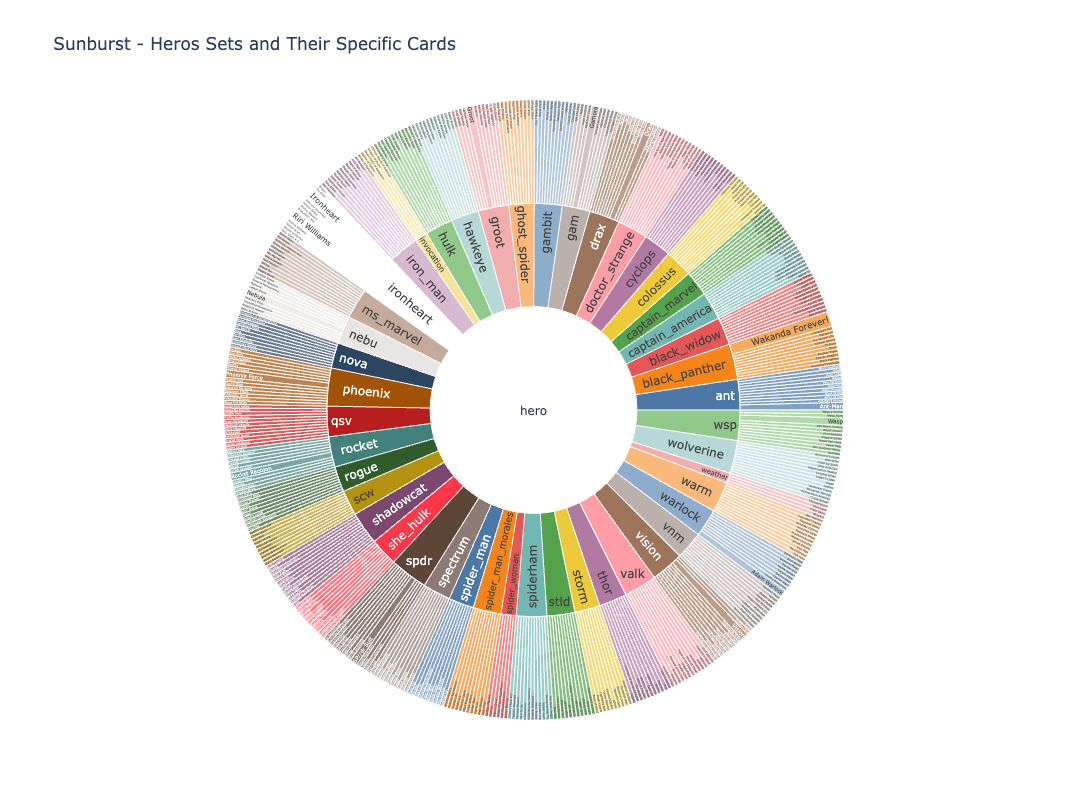

In [285]:
#create hero dataframe
hero_df = combined_df[combined_df['aspect'] == 'hero']
hero_df = hero_df.sort_values('set_code') #sort alphabetically

fig_hero = px.sunburst(hero_df, path=['aspect', 'set_code','name'],
                 # values = none,
                  title = 'Sunburst - Heros Sets and Their Specific Cards',
                  hover_data=['cost','text'],
                  color_discrete_sequence=px.colors.qualitative.T10,
                  maxdepth=3,
                  width=1000,height=800)

fig_hero.update_traces(sort=False) #don't resort
#this prevents the first leaves in the sunburst from sorting by count and preserves the alphabetical sort
fig_hero.show()

In [284]:
#create ally dataframe
ally_df = combined_df.query("type_code == 'ally'")
ally_df = ally_df.reset_index(drop=True) #drop the old index numbers = true

[list of plotly colors](https://stackoverflow.com/questions/72496150/user-friendly-names-for-plotly-css-colors)

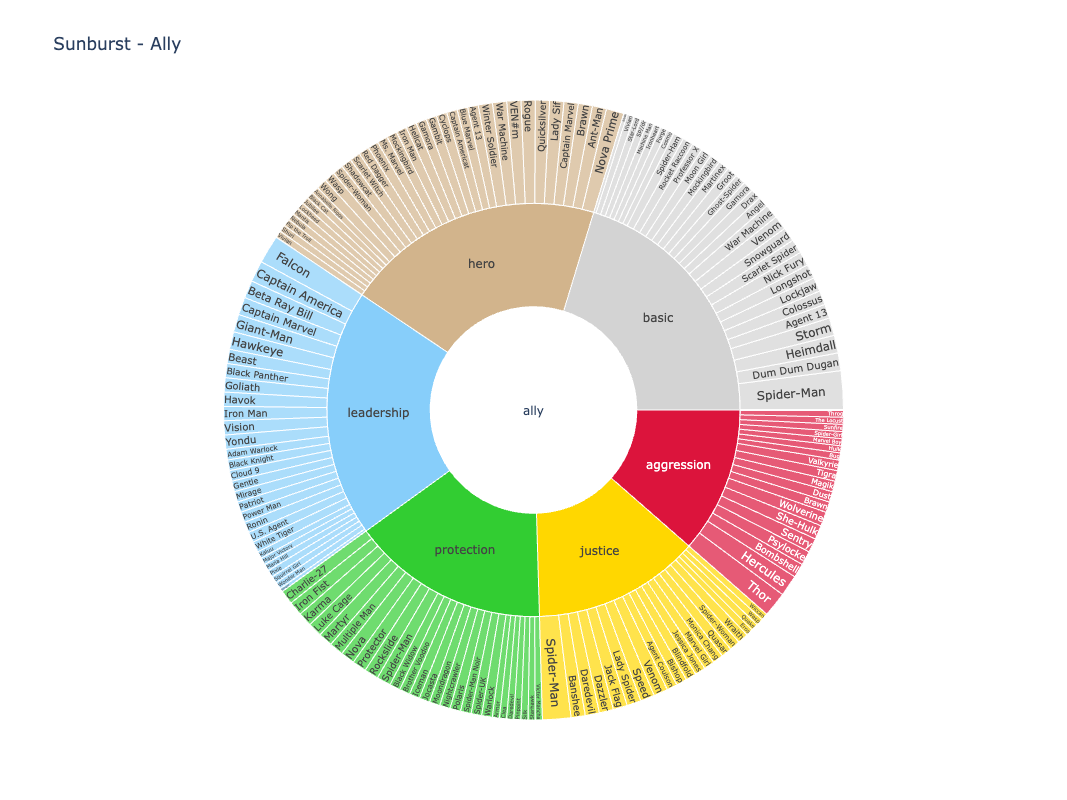

In [288]:
color_seq_ally=['lightgrey','tan','lightskyblue','limegreen','gold','crimson','orange']

fig_ally = px.sunburst(ally_df, path=['type_code','aspect','name'], values='cost',
                  title = 'Sunburst - Ally',
                  hover_data=['set_code','cost','health','attack','thwart','text'],
                  color_discrete_sequence=color_seq_ally,
                  maxdepth=3,
                  width=1000,height=800)

fig_ally.show()

In [231]:
#Query combined_df

#query where a column name = something
query_one = combined_df.query("type_code == 'hero'")['name']

#query where concatenating a column name and .notnull()

query_string = 'recover' + '.notnull()'
query_two = combined_df.query(query_string)

#query_one
query_two

,name,type_code,cost,resource_combined,set_code,text,aspect,traits,health,attack,thwart,defense,recover,deck_limit,hand_size,double_sided,flavor
1,Clint Barton,alter_ego,0,0.0,hawkeye,Weapon of Choice — <b>Action</b>: Spend 1 reso...,hero,S.H.I.E.L.D.,9.0,NaN,NaN,NaN,3.0,1.0,6.0,NaN,NaN
21,Jessica Drew,alter_ego,0,0.0,spider_woman,Double Agent — Choose two aspects instead of o...,hero,S.H.I.E.L.D. Spy.,11.0,NaN,NaN,NaN,3.0,1.0,6.0,NaN,NaN
53,Brunnhilde,alter_ego,0,0.0,valk,<b>Setup:</b> Set the Death Glow upgrade aside...,hero,Asgard.,12.0,NaN,NaN,NaN,4.0,1.0,6.0,NaN,NaN
77,Jean Grey,alter_ego,0,0.0,phoenix,<b>Setup</b>: Put your Phoenix Force upgrade i...,hero,Mutant. Psionic.,9.0,NaN,NaN,NaN,3.0,NaN,6.0,1.0,NaN
104,James Rhodes,alter_ego,0,0.0,warm,<b>Action</b>: Choose a War Machine card in yo...,hero,S.H.I.E.L.D. Soldier.,10.0,NaN,NaN,NaN,3.0,1.0,6.0,NaN,NaN
127,Groot,alter_ego,0,0.0,groot,<i>Growth Spurt</i> — <b>Action</b>: Place 2 g...,hero,Outlaw.,10.0,NaN,NaN,NaN,4.0,1.0,6.0,NaN,NaN
146,Rocket Raccoon,alter_ego,0,0.0,rocket,<i>Tinkering</i> — <b>Action</b>: Choose and d...,hero,Genius. Outlaw.,9.0,NaN,NaN,NaN,3.0,1.0,6.0,NaN,"""Ain't nothin' like me, 'cept me."""
207,Stephen Strange,alter_ego,0,0.0,doctor_strange,Stephen Strange begins the game with an [[Invo...,hero,Mystic.,10.0,NaN,NaN,NaN,3.0,1.0,6.0,NaN,NaN
236,Gwen Stacy,alter_ego,0,0.0,ghost_spider,<b>Action:</b> Choose to either shuffle Ticket...,hero,Civilian.,10.0,NaN,NaN,NaN,3.0,NaN,6.0,NaN,"""Time for the drum solo!"""
257,Miles Morales,alter_ego,0,0.0,spider_man_morales,<b>Response</b>: After you change to this form...,hero,Civilian.,9.0,NaN,NaN,NaN,4.0,NaN,6.0,NaN,"""Once you've leaped from skyscrapers and fough..."
